<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
# your code goes here
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#check if still missing values in ConvertedComp culumn
df["ConvertedComp"].isna().sum(axis=0)

816

In [5]:
#find median value
ConvertedComp_median= df["ConvertedComp"].median()
ConvertedComp_median

57745.0

In [6]:
#replace missing values with median value
df['ConvertedComp'].replace({np.nan: ConvertedComp_median}, inplace=True)

In [7]:
#check if still missing values in column ConvertedComp
df["ConvertedComp"].isna().value_counts()

False    11398
Name: ConvertedComp, dtype: int64

Text(0, 0.5, 'Number of survey participants')

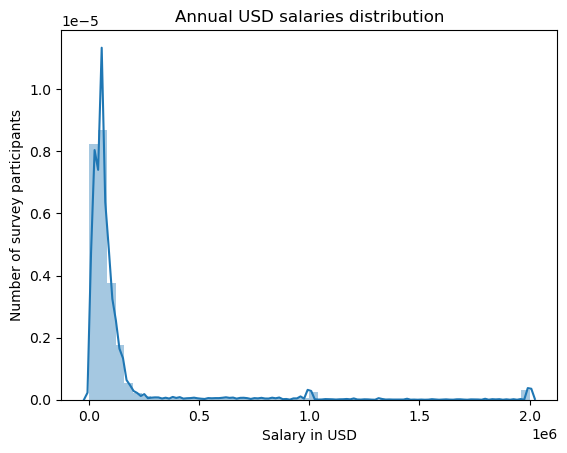

In [8]:
#plot the distribution of values
sns.distplot(df["ConvertedComp"])
plt.title("Annual USD salaries distribution")
plt.xlabel("Salary in USD")
plt.ylabel("Number of survey participants")

In [9]:
#Answer question of quiz: What´s the median of ConvertedComp of people who identify as woman?

##create dataframe with columns of interest
df2=df[["ConvertedComp", "Gender"]]
df2.head()

,ConvertedComp,Gender
0,61000.0,Man
1,95179.0,Man
2,90000.0,Man
3,455352.0,Man
4,65277.0,Man


In [10]:
#Group by Gender and get the median of ConvertedComp
df2.groupby("Gender").median()

,ConvertedComp
Gender,
Man,57745.0
"Man;Non-binary, genderqueer, or gender non-conforming",59520.0
"Non-binary, genderqueer, or gender non-conforming",66000.0
Woman,57745.0
Woman;Man,25887.0
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",30244.0
"Woman;Non-binary, genderqueer, or gender non-conforming",65535.5


Plot the histogram for the column `ConvertedComp`.


Text(0, 0.5, 'Number of survey participants')

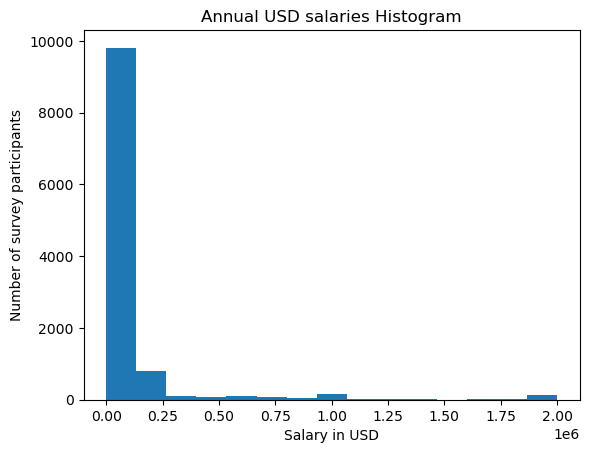

In [11]:
# your code goes here
plt.hist(df["ConvertedComp"], bins=15)
plt.title("Annual USD salaries Histogram")
plt.xlabel("Salary in USD")
plt.ylabel("Number of survey participants")

What is the median of the column `ConvertedComp`?


In [12]:
# your code goes here
ConvertedComp_median

57745.0

How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
df2.groupby("Gender").median()

,ConvertedComp
Gender,
Man,57745.0
"Man;Non-binary, genderqueer, or gender non-conforming",59520.0
"Non-binary, genderqueer, or gender non-conforming",66000.0
Woman,57745.0
Woman;Man,25887.0
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",30244.0
"Woman;Non-binary, genderqueer, or gender non-conforming",65535.5


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


(array([1415., 5528., 2858.,  899.,  411.]),
 array([ 15,  24,  32,  40,  48, 100]),
 <BarContainer object of 5 artists>)

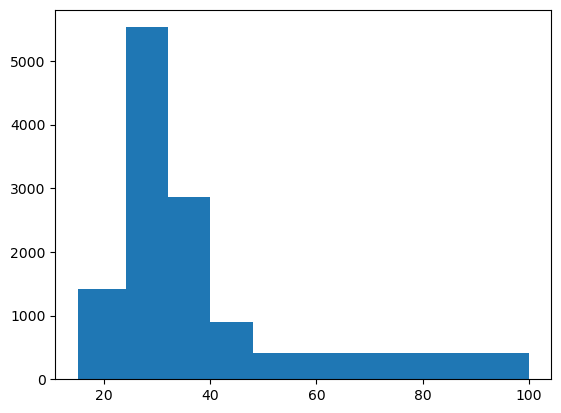

In [16]:
#Plot histogram of Age distribution

plt.hist(df["Age"], bins=[15, 24, 32, 40, 48, 100])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


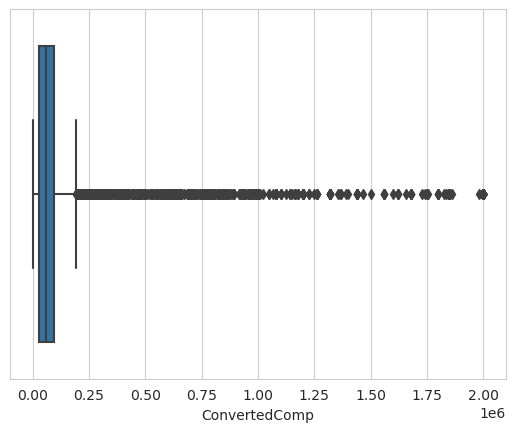

In [17]:
#in a box plot, points outside the plot represent possible outliers
plot=sns.set_style("whitegrid")
ax=sns.boxplot(x= df["ConvertedComp"])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
#Inter Quartile Range=the spread of the middle 50% of a dataset

In [19]:
# your code goes here
q3, q1 = np.percentile(df["ConvertedComp"], [75 ,25])
iqr = q3 - q1
print("Inter Quartile Range:", iqr)

Inter Quartile Range: 65984.0


Find out the upper and lower bounds.


In [20]:
# your code goes here
print("Upper bound:", q3)
print("Lower bound:", q1)

Upper bound: 95000.0
Lower bound: 29016.0


Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
outliers = (df["ConvertedComp"] < (q1 - 1.5 * iqr)) | (df["ConvertedComp"] > (q3 + 1.5 * iqr))
print("Nr of outliers:", outliers.value_counts().loc[True])

Nr of outliers: 933


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [22]:
df[outliers] = np.nan

In [23]:
#new mean value
df['ConvertedComp'].mean()

58992.50339225991

In [24]:
#new median value
df['ConvertedComp'].median()

57287.0

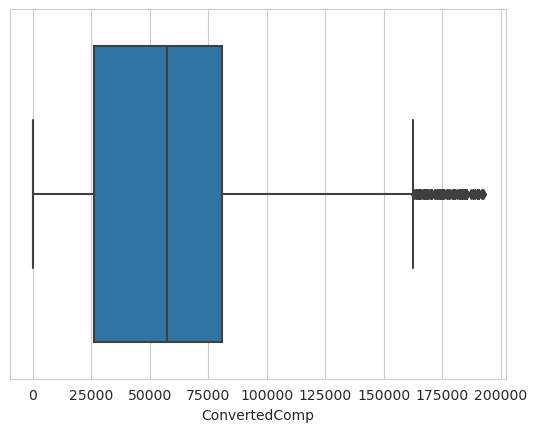

In [29]:
# check box plot of new df_new
plot=sns.set_style("whitegrid")
ax=sns.boxplot(x= df["ConvertedComp"])

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [31]:
# your code goes here
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10465.000000,9.656000e+03,10465.000000,10348.000000,8228.000000,10199.000000
mean,12494.160057,7.274133e+05,58992.503392,41.874058,4.807974,30.621512
std,7234.905154,7.204382e+06,40544.600719,24.357563,4.643520,7.337965
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6261.000000,2.000000e+04,26424.000000,40.000000,2.000000,25.000000
50%,12485.000000,6.220000e+04,57287.000000,40.000000,4.000000,29.000000
75%,18802.000000,1.150000e+05,81000.000000,42.500000,5.000000,34.000000
max,25142.000000,3.900000e+08,192500.000000,1012.000000,99.000000,99.000000


In [40]:
df2 =df[["Respondent", "CompTotal", "ConvertedComp", "WorkWeekHrs", "CodeRevHrs", "Age"]]
df2.head()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
0,4.0,61000.0,61000.0,80.0,NaN,22.0
1,9.0,138000.0,95179.0,32.0,12.0,23.0
2,13.0,90000.0,90000.0,40.0,5.0,28.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,17.0,90000.0,65277.0,45.0,5.0,29.0


(0.0, 409507719.16076493)

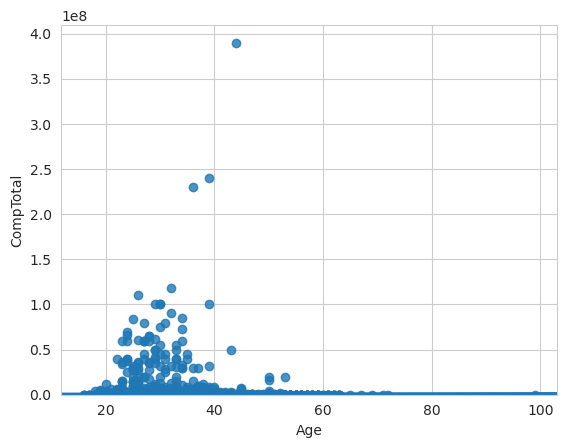

In [36]:
sns.regplot(x= "Age", y= "CompTotal", data= df2)
plt.ylim(0,)

(0.0, 103.15)

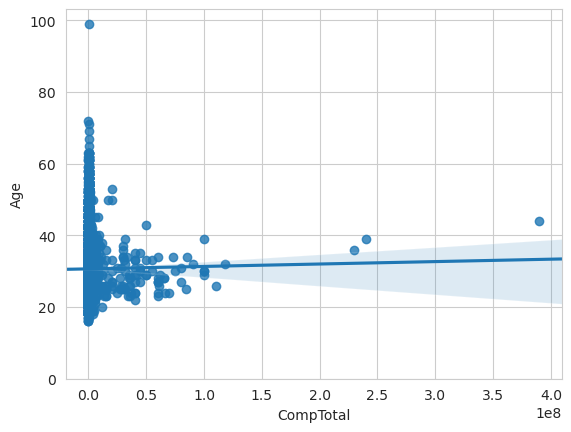

In [43]:
sns.regplot(x= "CompTotal", y="Age", data= df2)
plt.ylim(0,)

(0.0, 233477.02378076714)

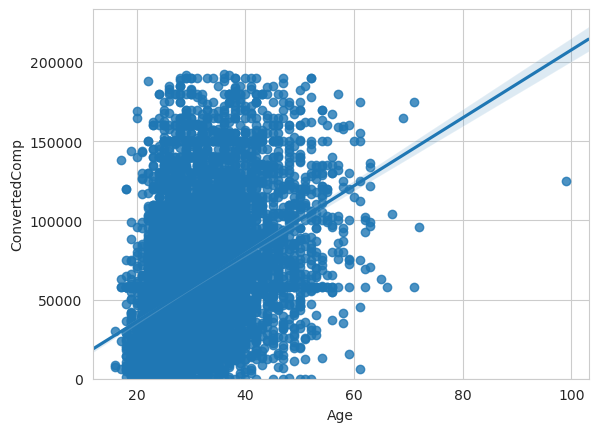

In [37]:
sns.regplot(x= "Age", y= "ConvertedComp", data= df2)
plt.ylim(0,)

(0.0, 1062.45)

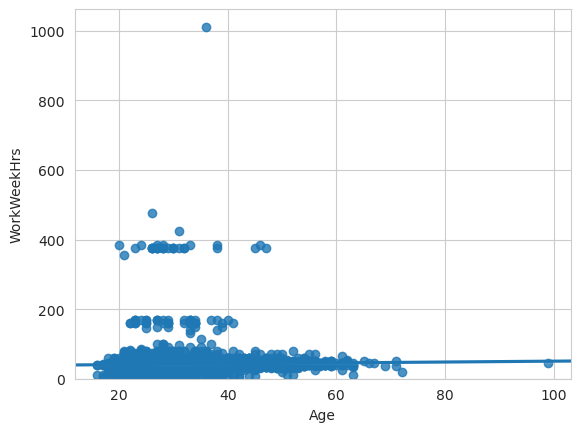

In [38]:
sns.regplot(x= "Age", y= "WorkWeekHrs", data= df2)
plt.ylim(0,)

(0.0, 103.95)

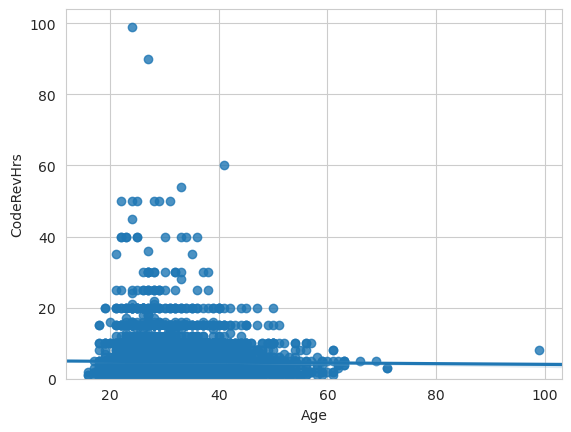

In [39]:
sns.regplot(x= "Age", y= "CodeRevHrs", data= df2)
plt.ylim(0,)

(0.0, 103.15)

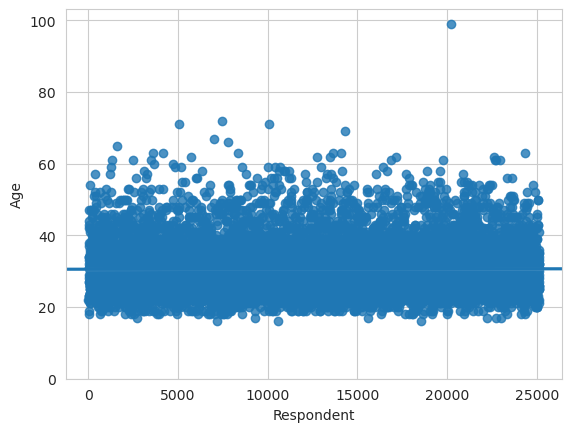

In [42]:
sns.regplot(x= "Respondent", y= "Age", data= df2)
plt.ylim(0,)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
